Processing Image from URL: /content/sample_data/blobimage.jpg


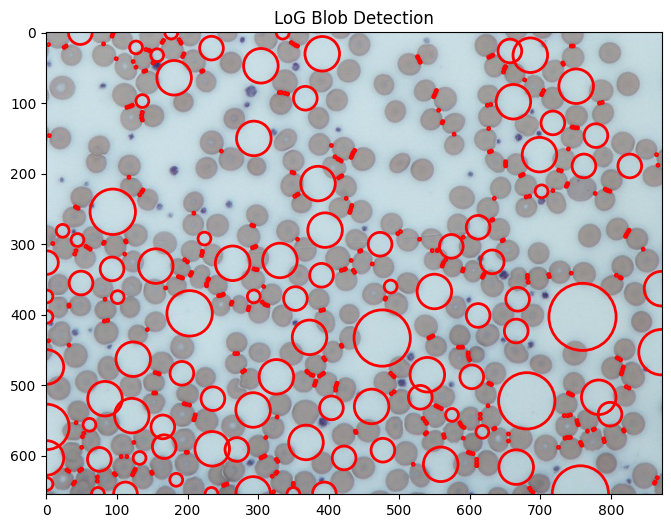

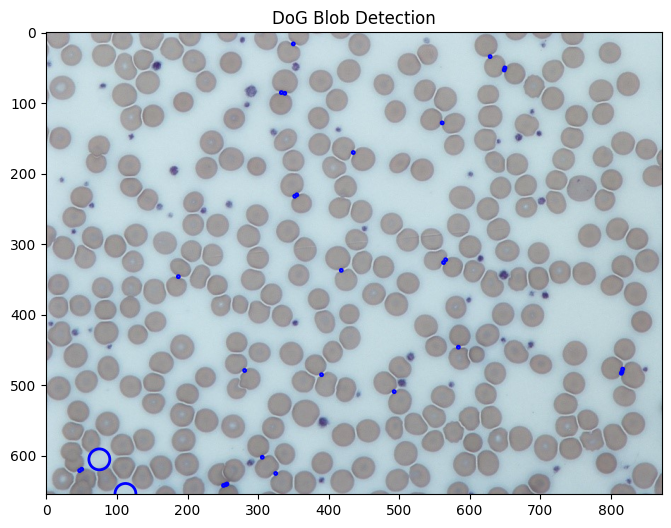

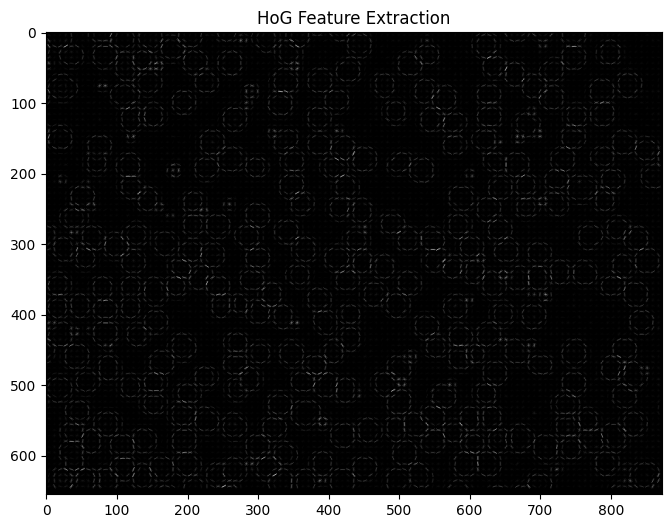

Processing Image from URL: /content/sample_data/sateliteimg.jpg


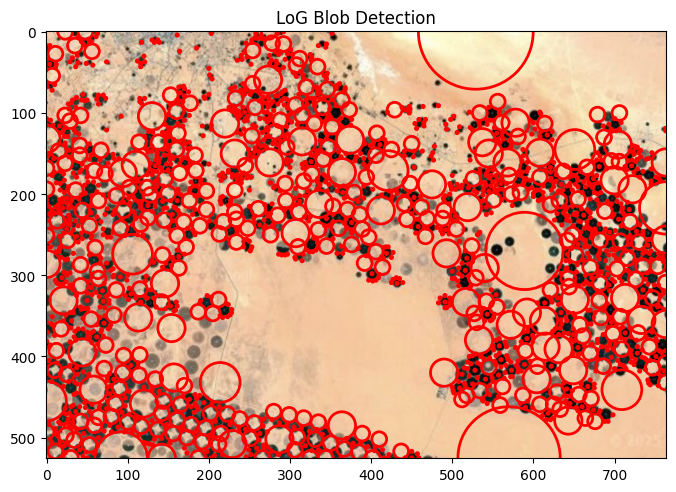

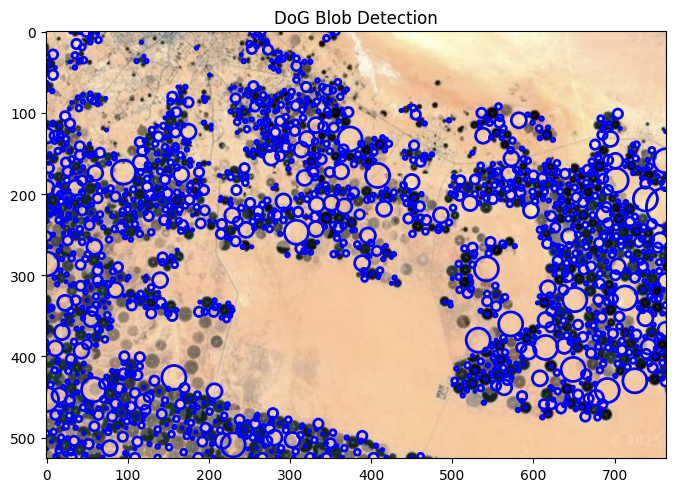

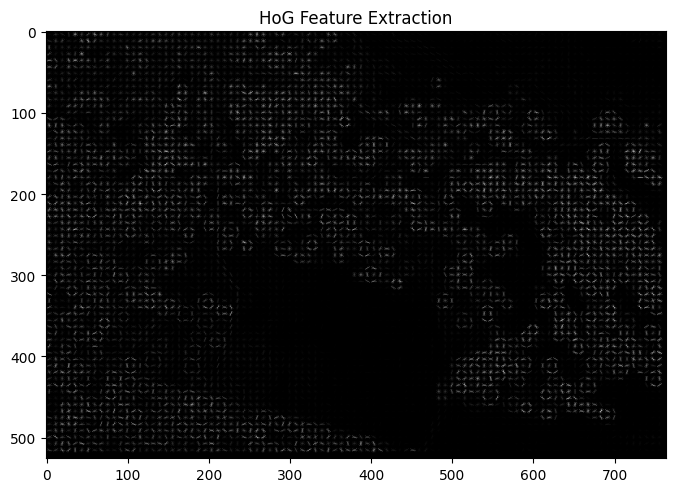

Processing Image from URL: /content/sample_data/toffee.jpg


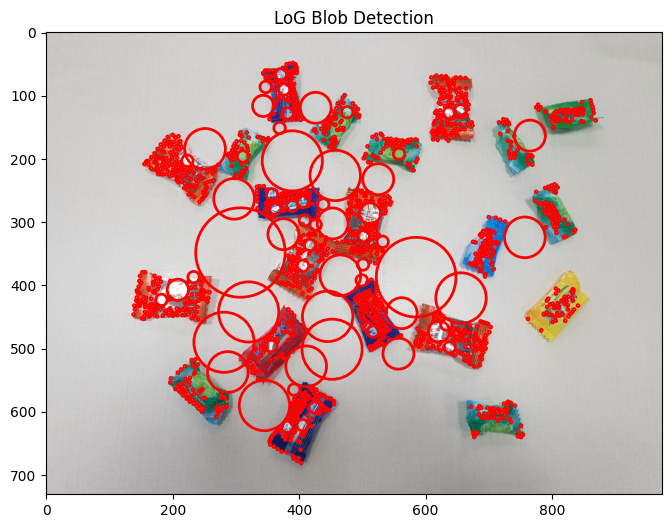

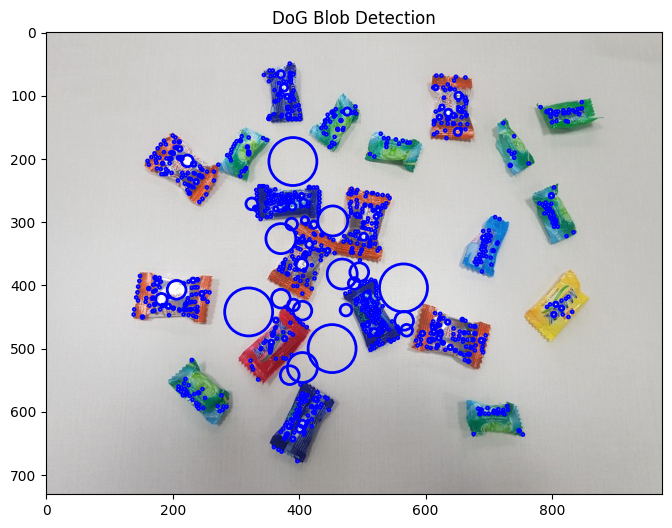

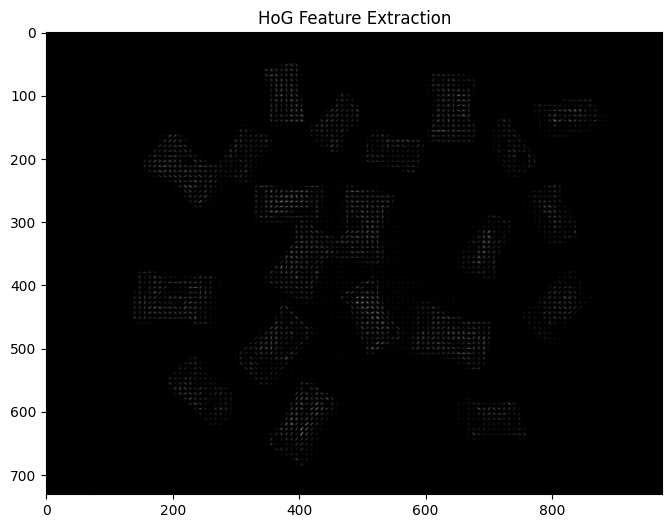

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog
from skimage import color
from skimage.feature import hog
import requests
from io import BytesIO

def log_blob_detection(image):
    gray = color.rgb2gray(image)
    blobs = blob_log(gray, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.1)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r * np.sqrt(2), color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.title("LoG Blob Detection")
    plt.show()

def dog_blob_detection(image):
    gray = color.rgb2gray(image)
    blobs = blob_dog(gray, min_sigma=1, max_sigma=50, sigma_ratio=1.6, threshold=0.1)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r * np.sqrt(2), color='blue', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.title("DoG Blob Detection")
    plt.show()

def hog_feature_extraction(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2), visualize=True, feature_vector=True)

    plt.figure(figsize=(8, 6))
    plt.imshow(hog_image, cmap='gray')
    plt.title("HoG Feature Extraction")
    plt.show()

# Load images from URLs
image_urls = [
    "/content/sample_data/blobimage.jpg",
    "/content/sample_data/sateliteimg.jpg",
    "/content/sample_data/toffee.jpg"
]

# Process images from URLs
for url in image_urls:
    img = cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    print(f"Processing Image from URL: {url}")
    log_blob_detection(img)
    dog_blob_detection(img)
    hog_feature_extraction(img)


In [ ]:
!pip install opencv-contrib-python


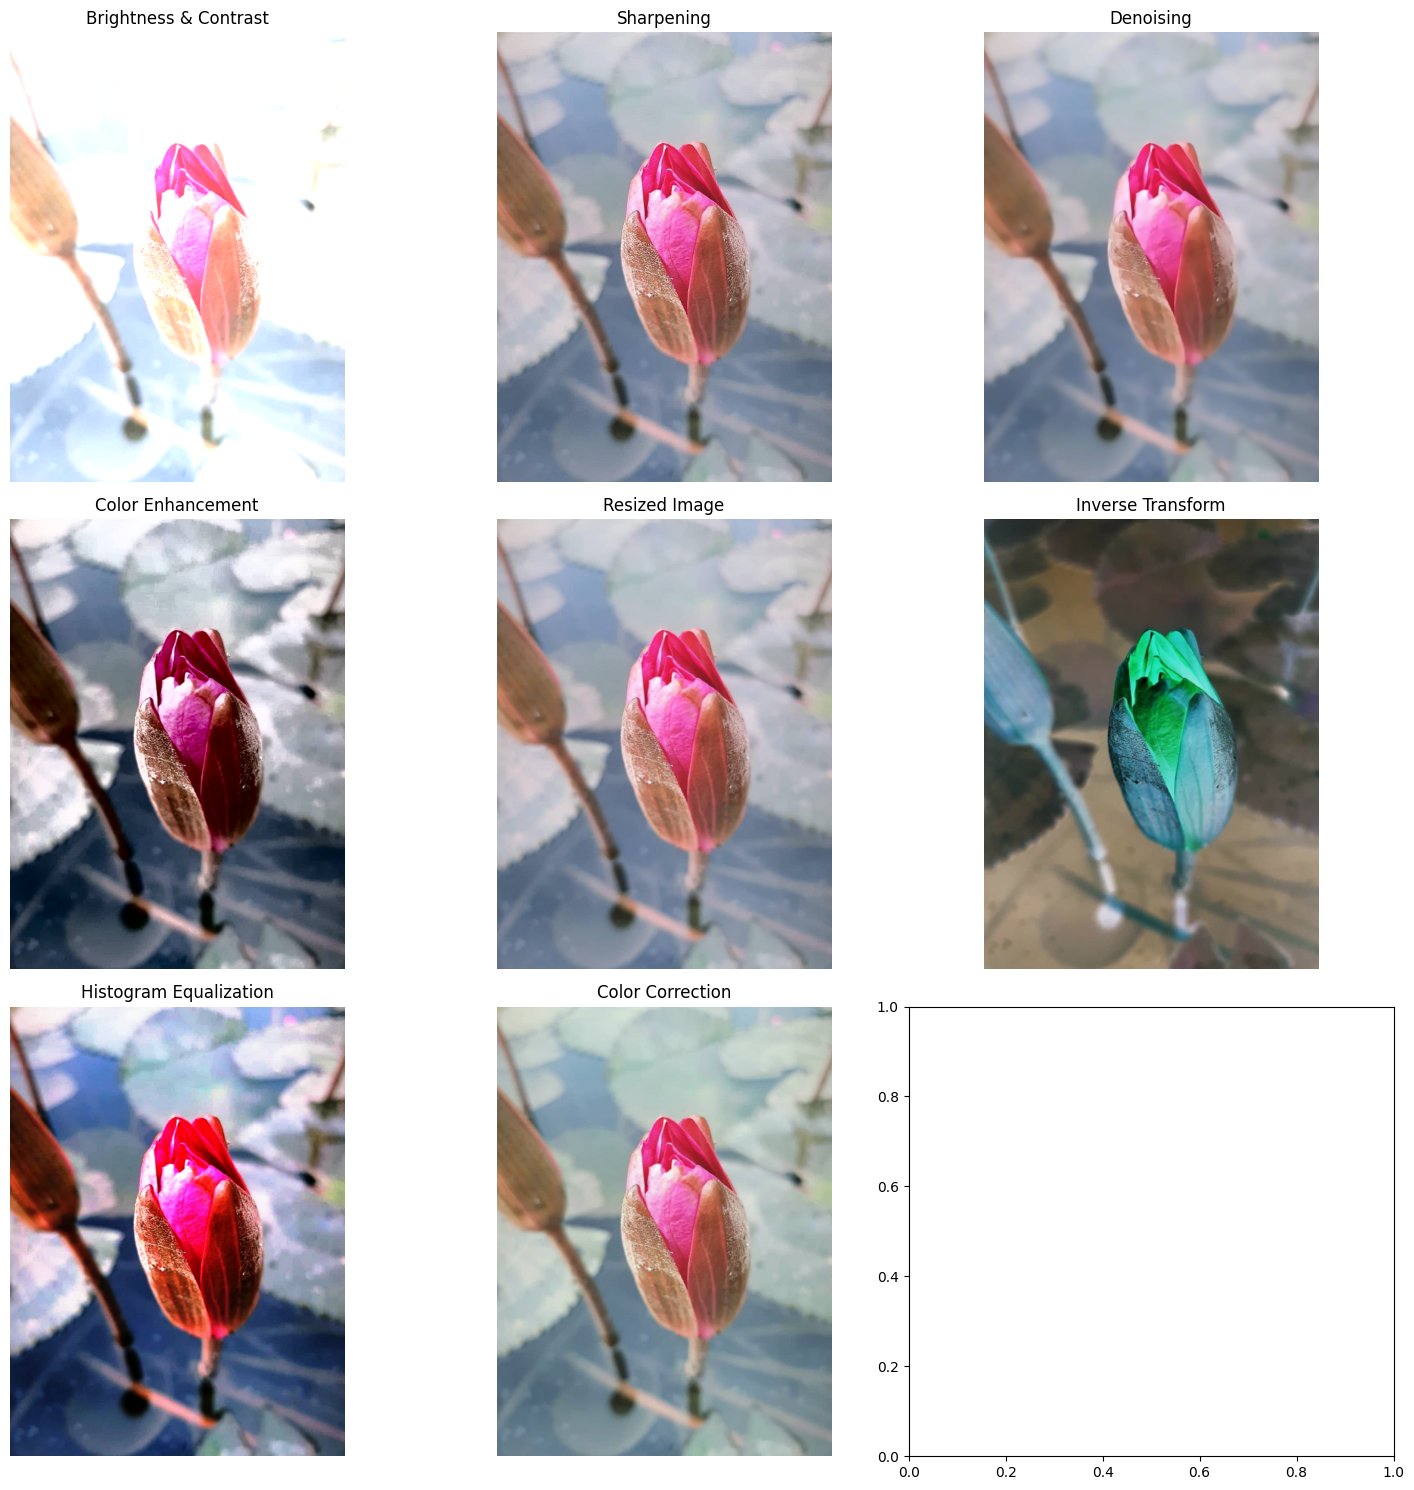

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import restoration
from skimage.exposure import equalize_hist

# Load image from local path in Colab
image_path = "/content/sample_data/flower.jpg"  # Update with your actual file path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Adjusting Brightness and Contrast
def adjust_brightness_contrast(image, alpha=1.5, beta=50):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Sharpening Image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Removing Noise (Denoising using Non-Local Means)
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# Enhancing Color
def enhance_color(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)
    lab = cv2.merge((l, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Image Resizing and Scaling
def resize_image(image, scale=2):
    return cv2.resize(image, (image.shape[1] * scale, image.shape[0] * scale))

# Inverse Transform (Negative Image)
def inverse_transform(image):
    return cv2.bitwise_not(image)

# Histogram Equalization
def equalize_histogram(image):
    return (equalize_hist(image) * 255).astype(np.uint8)

# Color Correction (Gray World Algorithm)
def color_correction(image):
    result = image.astype(np.float32)
    avg_b = np.mean(result[:, :, 0])
    avg_g = np.mean(result[:, :, 1])
    avg_r = np.mean(result[:, :, 2])
    avg_gray = (avg_b + avg_g + avg_r) / 3
    result[:, :, 0] *= (avg_gray / avg_b)
    result[:, :, 1] *= (avg_gray / avg_g)
    result[:, :, 2] *= (avg_gray / avg_r)
    return np.clip(result, 0, 255).astype(np.uint8)

# Processing Image
enhancements = {
    "Brightness & Contrast": adjust_brightness_contrast(image),
    "Sharpening": sharpen_image(image),
    "Denoising": remove_noise(image),
    "Color Enhancement": enhance_color(image),
    "Resized Image": resize_image(image),
    "Inverse Transform": inverse_transform(image),
    "Histogram Equalization": equalize_histogram(image),
    "Color Correction": color_correction(image)
}

# Display Results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for i, (title, img) in enumerate(enhancements.items()):
    axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.models import vgg16, alexnet

# Install necessary dependencies (Uncomment if needed)
# !pip install torch torchvision

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load CIFAR-100 dataset
train_dataset = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR100(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Load pretrained models with updated syntax
alexnet_model = alexnet(weights="IMAGENET1K_V1")
vgg16_model = vgg16(weights="IMAGENET1K_V1")

# Modify classifier for 100 classes
alexnet_model.classifier[6] = nn.Linear(4096, 100)
vgg16_model.classifier[6] = nn.Linear(4096, 100)

# Move models to device
alexnet_model = alexnet_model.to(device)
vgg16_model = vgg16_model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
alexnet_optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)
vgg16_optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)

def train_model(model, optimizer, epochs=5):
    model.train()
    start_time = time.time()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")
    end_time = time.time()
    return end_time - start_time

def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Train models
print("Training AlexNet...")
alexnet_time = train_model(alexnet_model, alexnet_optimizer)
print("Training VGG16...")
vgg16_time = train_model(vgg16_model, vgg16_optimizer)

# Evaluate models
alexnet_acc = evaluate_model(alexnet_model)
vgg16_acc = evaluate_model(vgg16_model)

# Print results
print(f"AlexNet - Accuracy: {alexnet_acc:.2f}%, Training Time: {alexnet_time:.2f}s")
print(f"VGG16 - Accuracy: {vgg16_acc:.2f}%, Training Time: {vgg16_time:.2f}s")


Using device: cpu


100%|██████████| 169M/169M [00:03<00:00, 50.2MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 96.9MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 91.8MB/s]


Training AlexNet...
